In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from scipy.stats import probplot
from scipy.stats import zscore
import scipy.stats as stats
import math
from scipy.stats import ttest_1samp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm
from scipy.stats import f_oneway
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.datasets import load_boston
import sklearn.preprocessing as sp
import statsmodels.stats.outliers_influence as smof
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [27]:
df = pd.read_csv('Capstone_Insurance_ Clean data.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Last policy months,Est. No of months,Unnamed: 19,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,35,40,True,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,4,74,True,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,41,119,True,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,1,72,True,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,-5,39,False,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [2]:
cat_cols = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender','Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size',
            'Number of Open Complaints', 'Number of Policies']

num_cols = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 
              'Months Since Policy Inception', 'Total Claim Amount']

In [4]:
df[num_cols].describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


In [5]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts(), '\n')

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64 

Response
No     7826
Yes    1308
Name: Response, dtype: int64 

Coverage
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64 

Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64 

EmploymentStatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64 

Gender
F    4658
M    4476
Name: Gender, dtype: int64 

Location Code
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64 

Marital Status
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64 

Policy Type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dty

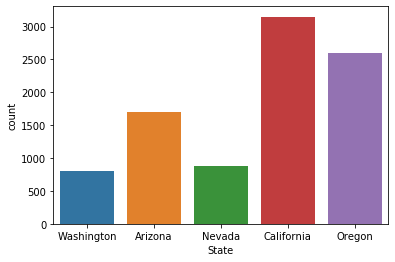

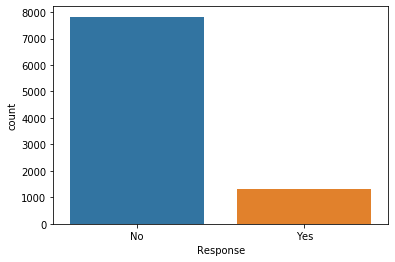

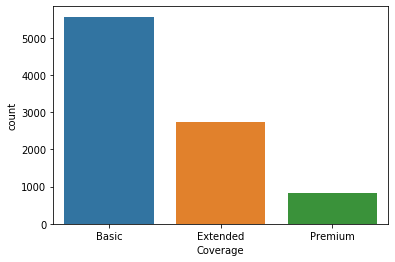

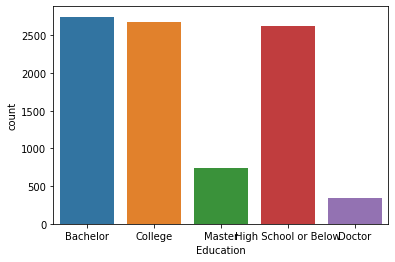

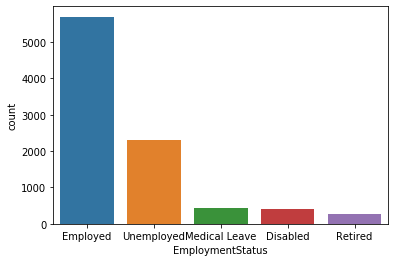

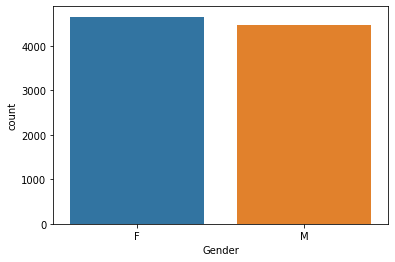

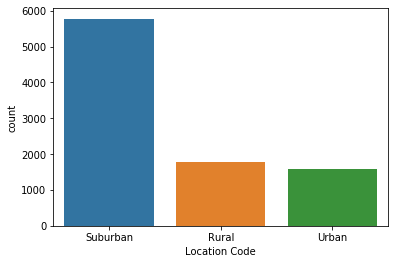

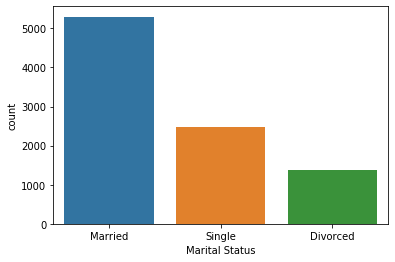

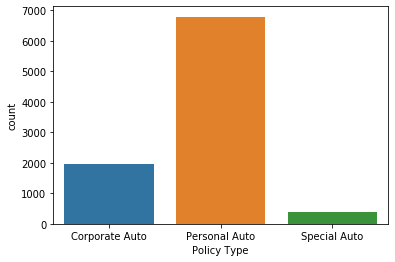

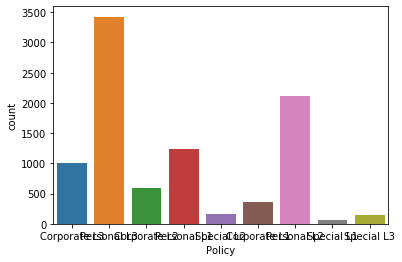

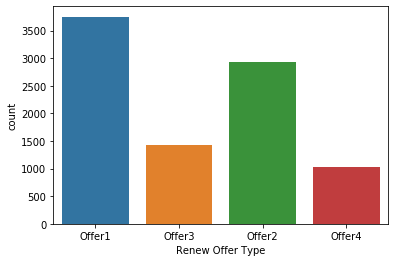

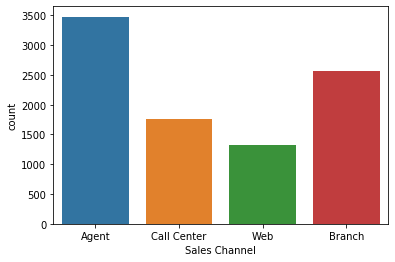

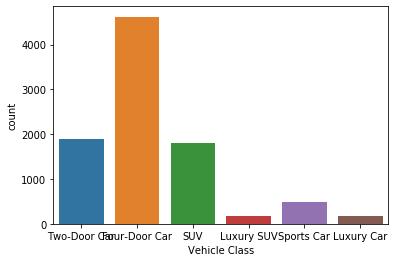

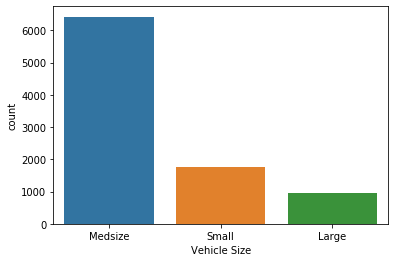

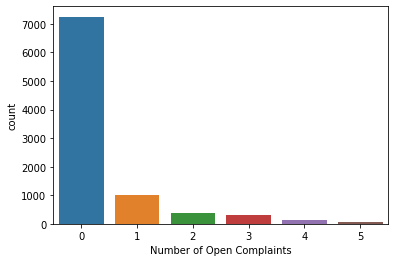

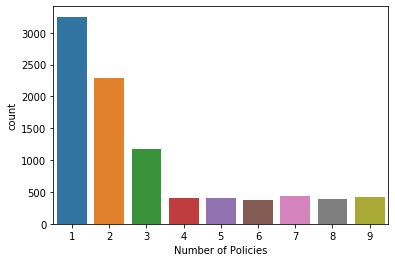

In [6]:
for i in cat_cols:
    sns.countplot(df[i])
    plt.show()

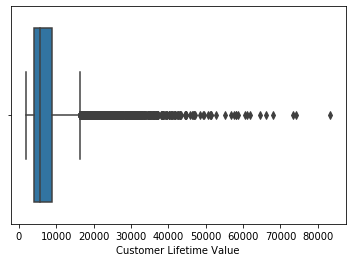

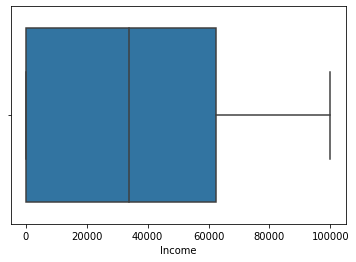

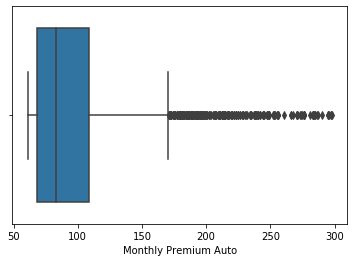

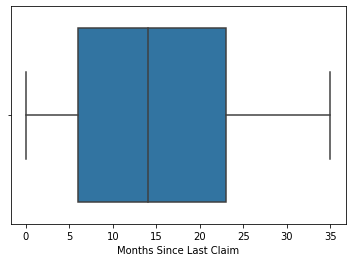

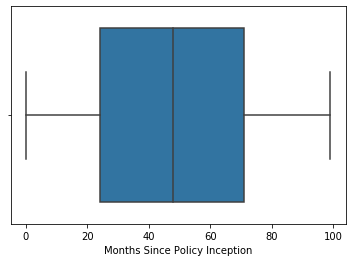

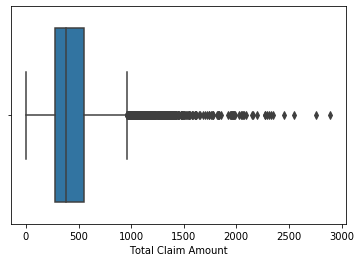

In [7]:
for j in num_cols:
    sns.boxplot(df[j])
    plt.show()

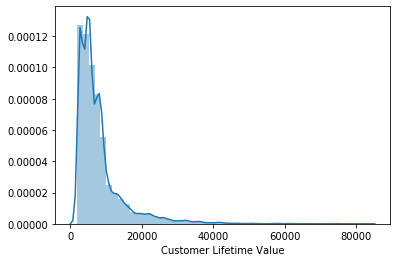

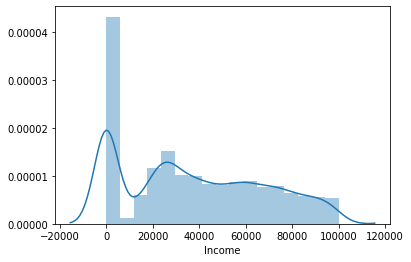

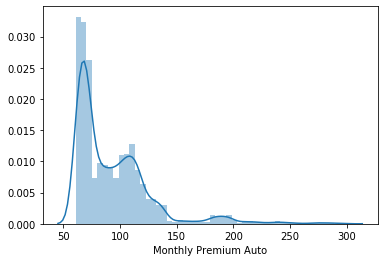

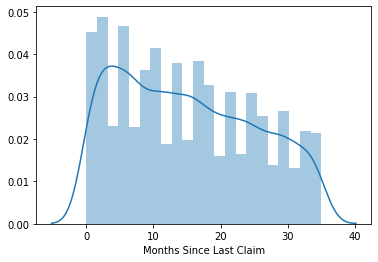

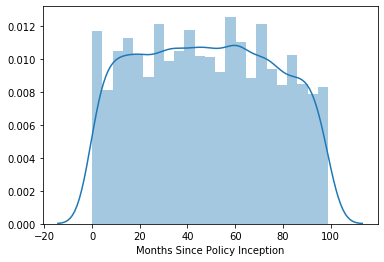

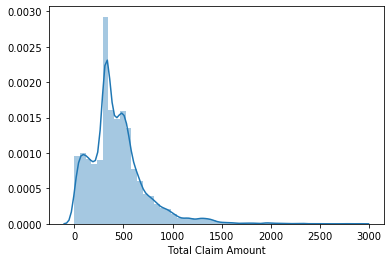

In [8]:
for j in num_cols:
    sns.distplot(df[j])
    plt.show()

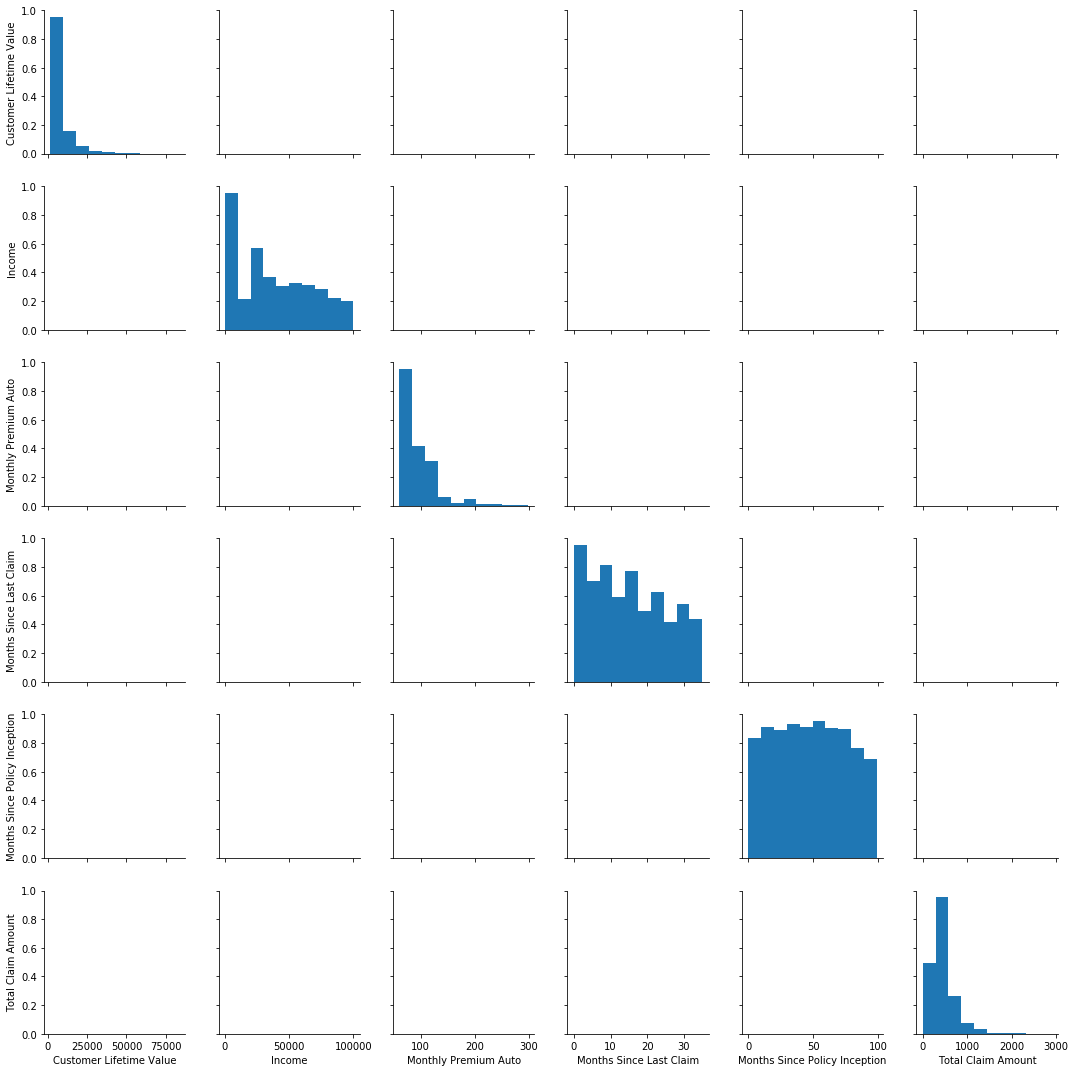

In [4]:
sns.pairplot(df[num_cols], kind = 'kde')
plt.show()

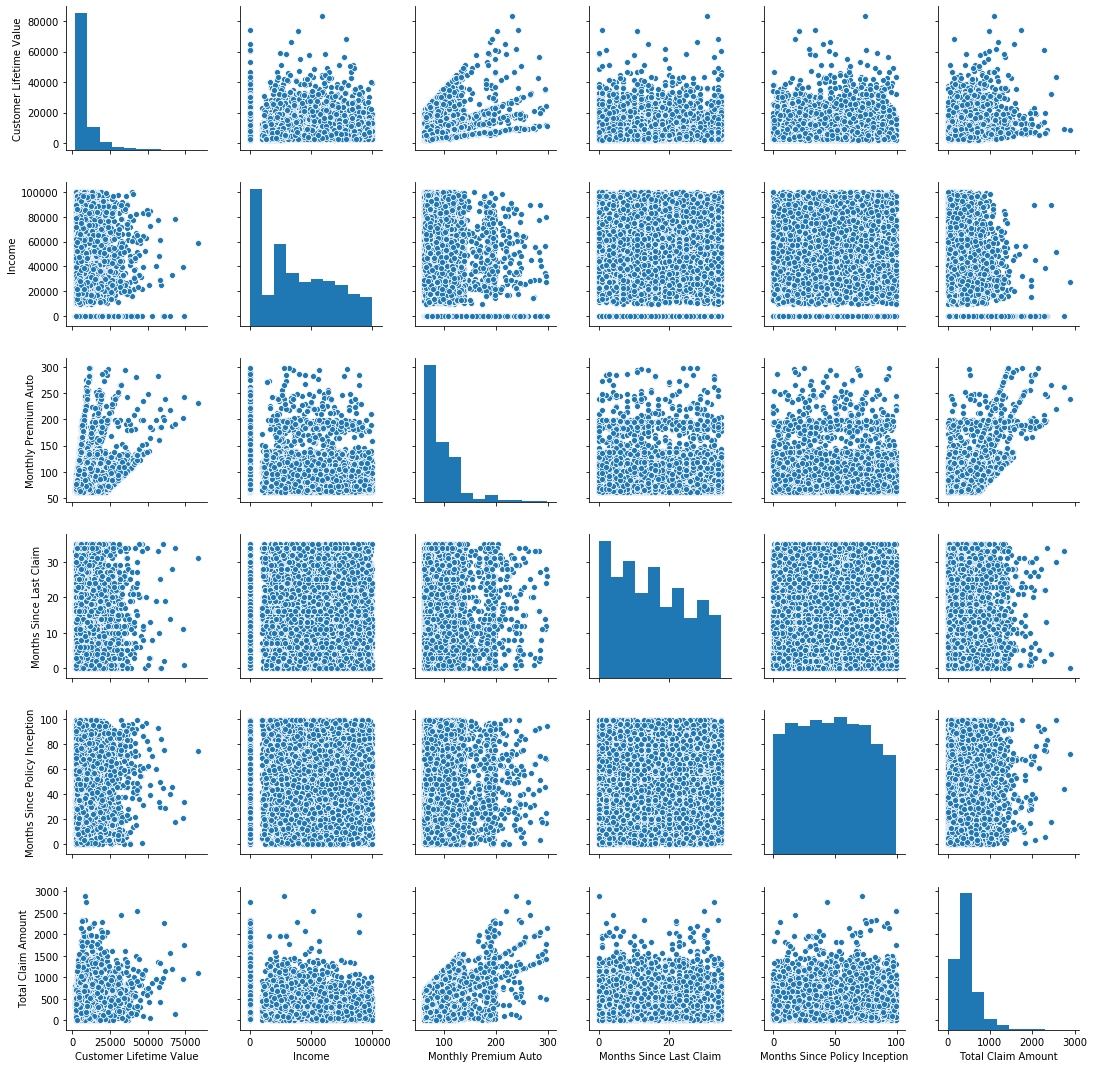

In [5]:
sns.pairplot(df[num_cols])
plt.show()

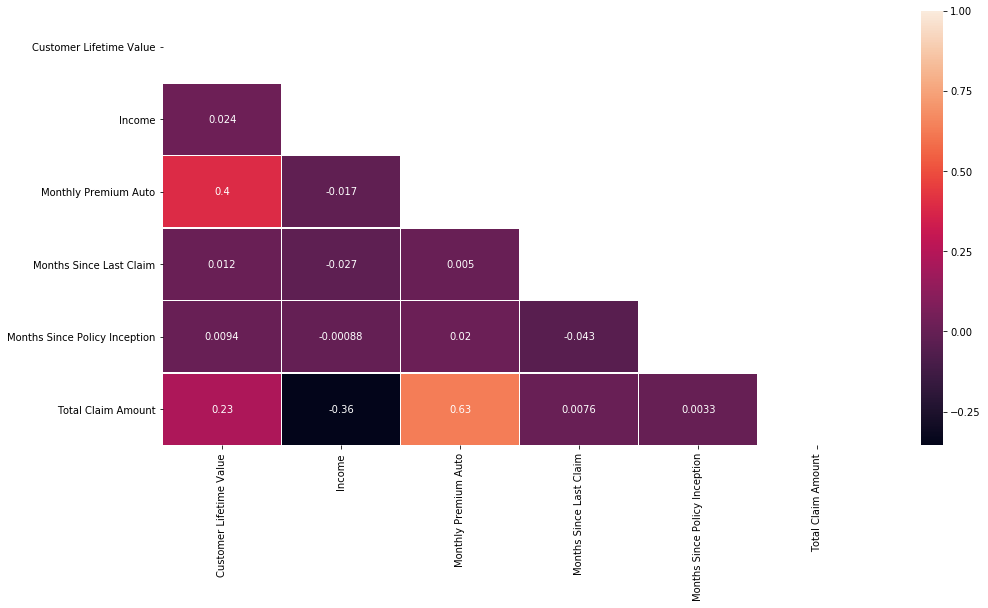

In [10]:
plt.figure(figsize = (16,8))
corr_back = df[num_cols].corr()
mask = np.zeros_like(corr_back, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_back, mask = mask, annot = True, linewidth = 0.5)
plt.show()

## Defining the Demographic

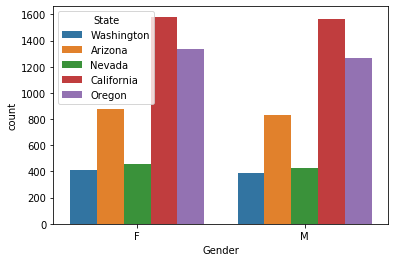

In [11]:
sns.countplot(df['Gender'], hue = df['State'])

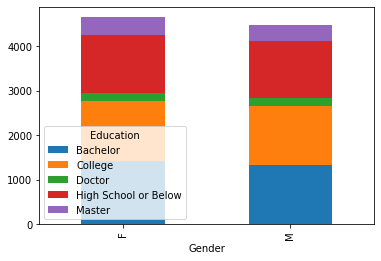

In [12]:
a = pd.crosstab(df['Gender'], df['Education'])
a.plot(kind = 'bar', stacked = True)
plt.show()

# Str to Numeric

In [28]:
df_new = df
df_new.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Last policy months,Est. No of months,Unnamed: 19,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,35,40,True,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,4,74,True,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,41,119,True,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,1,72,True,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,-5,39,False,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [29]:

df_new['Coverage'] = df_new['Coverage'].replace({'Basic':0, 'Extended':1, 'Premium': 2})
df_new['Education'] = df_new['Education'].replace({'High School or Below':0, 'College':1, 'Bachelor': 2, 'Master': 3, 'Doctor': 4})
df_new['Marital Status'] = df_new['Marital Status'].replace({'Married':0, 'Single':1, 'Divorced': 2})
df_new['Renew Offer Type'] = df_new['Renew Offer Type'].replace({'Offer1':0, 'Offer2':1, 'Offer3': 2, 'Offer4': 3})
df_new['Vehicle Class'] = df_new['Vehicle Class'].replace({'Two-Door Car':0, 'Four-Door Car':1, 'SUV': 2, 'Luxury SUV': 3, 
                                                   'Sports Car': 4, 'Luxury Car': 5})
df_new['State'] = df_new['State'].replace({'Washington':1, 'Arizona':2, 'Nevada':3, 'California':4, 'Oregon':5})
df_new['Response'] = df_new['Response'].replace({'Yes':1, 'No':0})
df_new['Gender'] = df_new['Gender'].replace({'M':1, 'F':0})
df_new['EmploymentStatus'] = df_new['EmploymentStatus'].replace({'Unemployed':0, 'Disabled':1, 'Retired':2, 
                                                                 'Medical Leave':3,'Employed':4})
df_new['Location Code'] = df_new['Location Code'].replace({'Rural':0, 'Suburban':1, 'Urban':2})
df_new['Policy Type'] = df_new['Policy Type'].replace({'Corporate Auto':0, 'Personal Auto':1, 'Special Auto':2})
df_new['Sales Channel'] = df_new['Sales Channel'].replace({'Agent':0, 'Call Center':1, 'Web':2,'Branch':3})
df_new['Vehicle Size'] = df_new['Vehicle Size'].replace({'Small':0, 'Medsize':1, 'Large':2})
df_new['Policy'] = df_new['Policy'].replace({'Corporate L1':0, 'Corporate L2':1, 'Corporate L3':2, 
                                                                 'Personal L1':3, 'Personal L2':4, 'Personal L3':5,
                                            'Special L1':6, 'Special L2':7, 'Special L3':8})

df_new.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Last policy months,Est. No of months,Unnamed: 19,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,1,2763.519279,0,0,2,2011-02-24,4,0,56274,1,0,69,32,5,0,1,35,40,True,0,2,0,0,384.811147,0,1
1,QZ44356,2,6979.535903,0,1,2,2011-01-31,0,0,0,1,1,94,13,42,0,8,4,74,True,1,5,2,0,1131.464935,1,1
2,AI49188,3,12887.431650,0,2,2,2011-02-19,4,0,48767,1,0,108,18,38,0,2,41,119,True,1,5,0,0,566.472247,0,1
3,WW63253,4,7645.861827,0,0,2,2011-01-20,0,1,0,1,0,106,18,65,0,7,1,72,True,0,1,0,1,529.881344,2,1
4,HB64268,1,2813.692575,0,0,2,2011-02-03,4,1,43836,0,1,73,12,44,0,1,-5,39,False,1,3,0,0,138.130879,1,1


Scaling the numeric columns to have a better results for clustering

In [15]:
df_new[num_cols].head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


# Scaling the original DB

In [3]:
df1 = pd.read_csv('Capstone_Insurance_ Clean data.csv')
df1 = df1.drop(['Unnamed: 0', 'Last policy months', 'Est. No of months', 'Unnamed: 19'], axis = 1)
df1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [26]:
from sklearn.preprocessing import scale as scale
scaled_df = scale(df1[num_cols])
scaled_df

array([[-0.76287773,  0.61282744, -0.70392465,  1.67809933, -1.54328695,
        -0.16963969],
       [-0.14924546, -1.23961684,  0.02269103, -0.2081864 , -0.21733419,
         2.400737  ],
       [ 0.71063622,  0.36570978,  0.42959581,  0.28820458, -0.36068043,
         0.45573376],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, -0.60529919, -0.39651699,
         1.22793667],
       [-0.06993547, -0.51735647,  0.08082028,  1.87665573, -1.61496007,
         0.88511256],
       [-0.78495478, -1.23961684, -0.47140763, -1.20096836,  1.50282075,
        -0.22200449]])

In [10]:
cluster_range = range(1,20)
cluster_wss = []

from sklearn.cluster import KMeans

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_df)
    cluster_wss.append(clusters.inertia_)

from collections import OrderedDict
cluster_df = pd.DataFrame(OrderedDict ({'num_clusters': cluster_range, 'cluster_wss': cluster_wss}))
cluster_df  

,num_clusters,cluster_wss
0,1,54804.000000
1,2,44469.245667
2,3,38058.024883
3,4,34238.951074
4,5,30697.911887
5,6,27904.442010
6,7,25891.004620
7,8,24262.181408
8,9,22893.286547
9,10,21933.306427


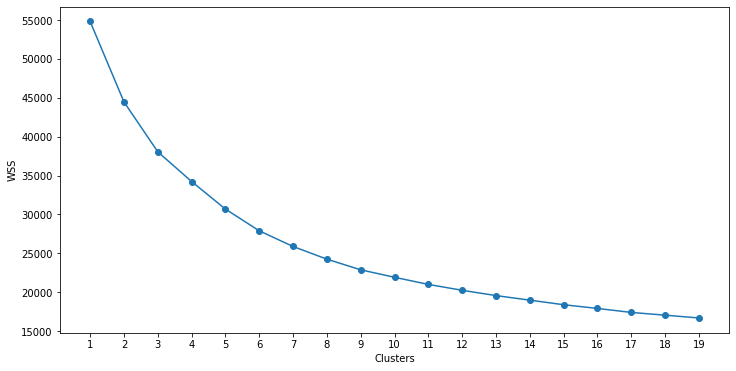

In [11]:
plt.figure(figsize = (12,6))
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.xticks(np.arange(min(cluster_df.num_clusters), max(cluster_df.num_clusters)+1, 1.0))

plt.plot(cluster_df.num_clusters, cluster_df.cluster_wss, marker = 'o')
plt.show()

In [12]:
kcluster = KMeans(n_clusters = 5, random_state = 10)
kcluster

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [13]:
kcluster.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [14]:
df1['Clusters'] = kcluster.predict(scaled_df)
df1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Clusters
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,4
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,4
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,4
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,3
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


In [15]:
df1.to_csv('Clustered insurance.csv')

In [16]:
clus_profile_all = df1.groupby(df1['Clusters']).median()
clus_profile_all

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Clusters,,,,,,,,
0,5549.090920,72524,74,13,48,0,2,272.693576
1,11501.845835,24042,186,14,47,0,2,1048.800000
2,25464.820590,35095,102,15,50,0,2,451.139860
3,5252.511788,20993,81,12,73,0,2,439.352186
4,5240.516698,21986,78,17,23,0,2,431.157313


In [17]:
clus_profile_all['Total Claim Amount']/clus_profile_all['Monthly Premium Auto']

Clusters
0    3.685048
1    5.638710
2    4.422940
3    5.424101
4    5.527658
dtype: float64

In [18]:
clus_profile_allcat = df1[cat_cols].groupby(df1['Clusters']).agg(pd.Series.mode)
clus_profile_allcat

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
Clusters,,,,,,,,,,,,,,,,
0,California,No,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Agent,Four-Door Car,Medsize,0,1
1,California,No,Premium,High School or Below,Employed,M,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,SUV,Medsize,0,1
2,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,0,2
3,California,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,0,1
4,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,0,1


In [19]:
df1['Clusters'].value_counts()

0    2812
4    2658
3    2545
1     570
2     549
Name: Clusters, dtype: int64

# Observations:
Cluster 0 - Cluster 0 has the highest number of customers. These customers have the 3rd highest CLV and have the highest Avg. income and the claim amount is the least. 
Most customers in this cluster are Females from Rural areas on Basic Coverage, they have a Bachelors degree and opt for Offer Type 2 while renewing.
A mid sized, four door car is most common in this cluster. 

Cluster 1 - There ar eonly 570 customers in this cluster who have the 2nd highest CLV. While their income is low, their avg. monthly premium amount is the highest at $186. This also reflects in the highest claim amount of $1048. The avg Claim amount for all customers is arnd ~400, this stands at $600 higher than avg. Most extreme values lie in this cluster in terms of CLV & monthly premium too.
These customers are mostly males on a premium coverage living in Suburban areas. However they are the least qualified amongst other clusters.
Also the high monthly premium is also reflected in the car driven whihc is a Midsized SUV.

Cluster 2 - This cluster has the least number of customers but the highest CLV is seen in these customers. These customers a very few but valued as their premium is also on the higher side but their claim amounts are not.
They are mostly Females from Suburban areas of Claifornia and the seem to be for a longer time as they have 2 policies with the same company before this.
##This is probably the most profitable cluster and the company would want to have more number of customers here.

Cluster 3 - This cluter has 2545 customers who have an avg CLV of ~$5k. The positive point about these customers is that they have opted for polices which are for a longer duration. They are mostly males with a College degree with a four door midsized car.

Cluster 4 - With 2nd highest number of customers, this cluster has more or less similar features like cluster 3. Although these customers opt for a policy which has the least duration. Also since the avg. no. of policies is 1, they look like fresh customers who are unsure about the insurance company. There is an opportunity to pitch a longer duration policy to them.

# Silhoutte Clustering

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [36]:
X, y = make_blobs(n_samples=500,
                  n_features=6,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

In [38]:
df_new.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Last policy months',
       'Est. No of months', 'Unnamed: 19', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [40]:
dk1 = df_new.drop(['Customer', 'Effective To Date','Last policy months','Est. No of months', 'Unnamed: 19'], axis = 1)

For n_clusters = 2 The average silhouette_score is : 0.26988372411814104
For n_clusters = 3 The average silhouette_score is : 0.1731320519640334
For n_clusters = 4 The average silhouette_score is : 0.1647710613436873
For n_clusters = 5 The average silhouette_score is : 0.1701224302680813
For n_clusters = 6 The average silhouette_score is : 0.17747056870385777
For n_clusters = 7 The average silhouette_score is : 0.17656804716690433
For n_clusters = 8 The average silhouette_score is : 0.17747010777196465
For n_clusters = 9 The average silhouette_score is : 0.1744288259362016


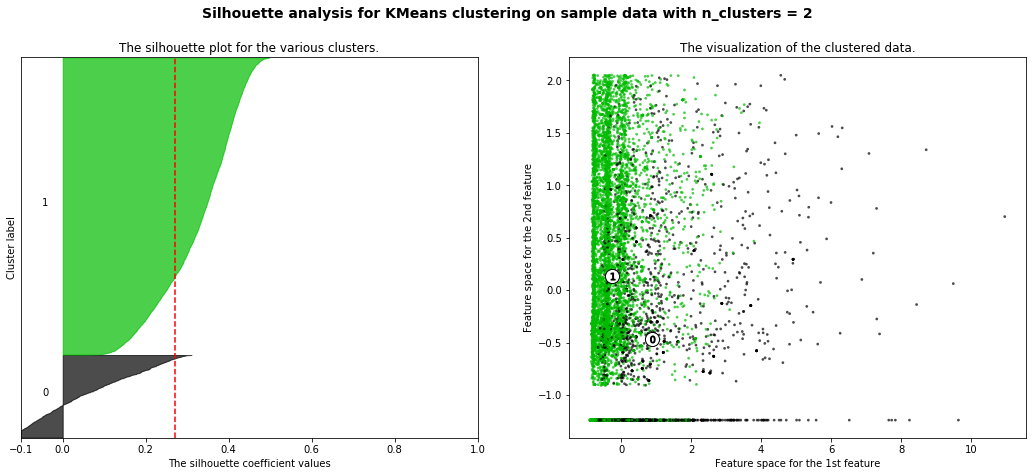

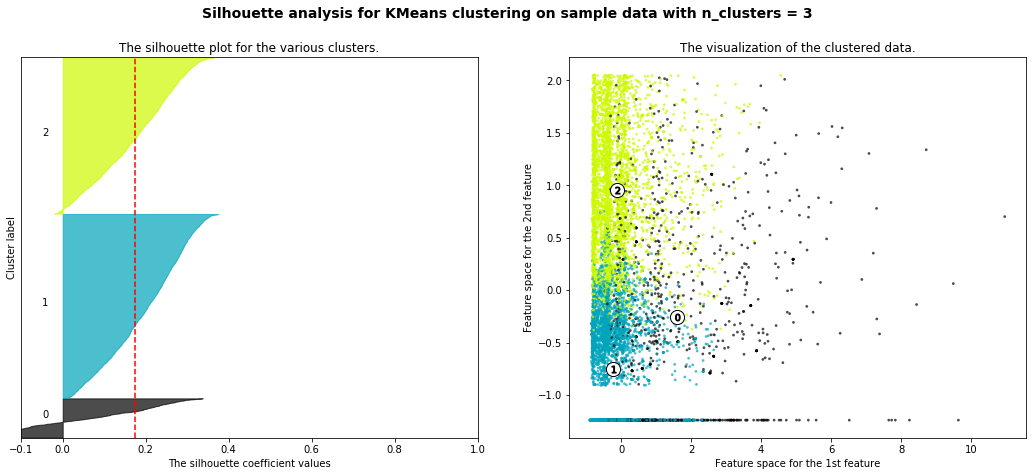

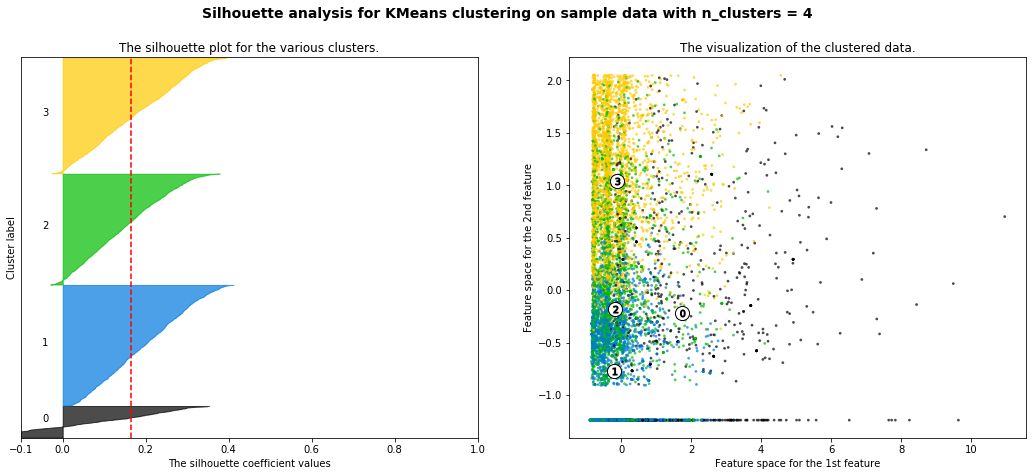

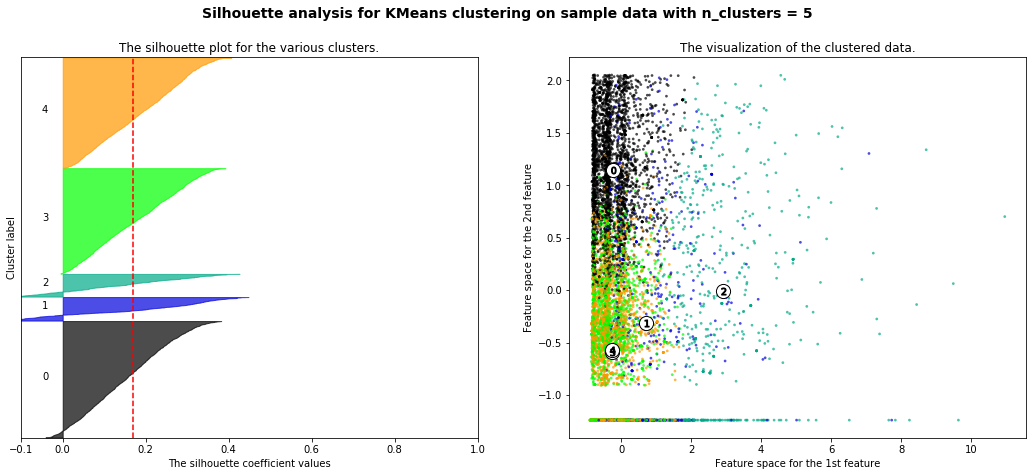

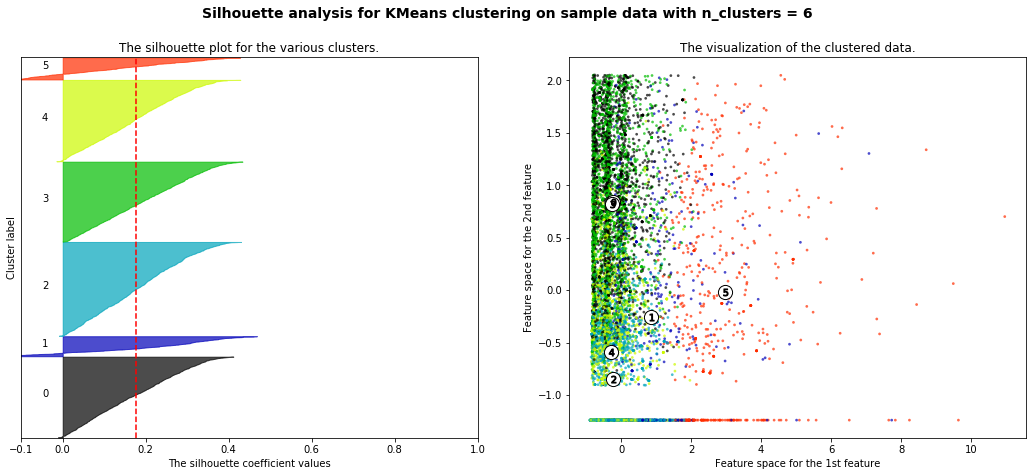

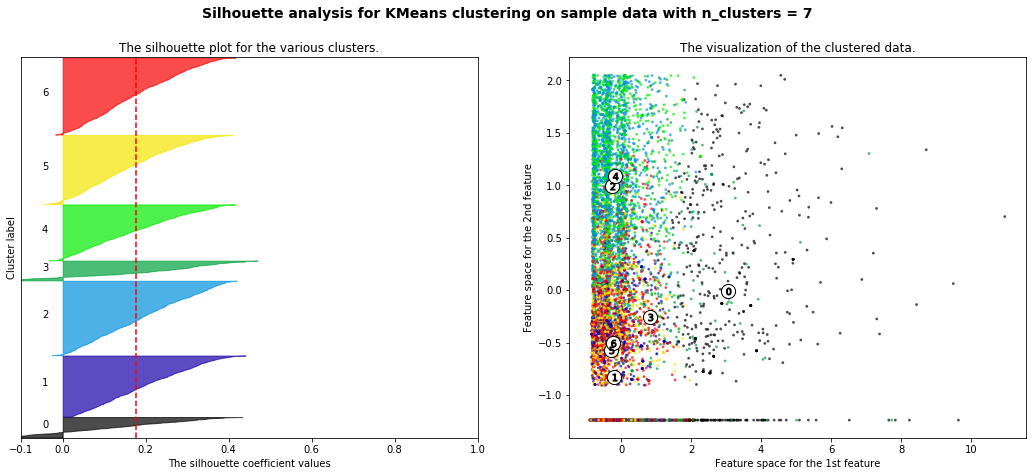

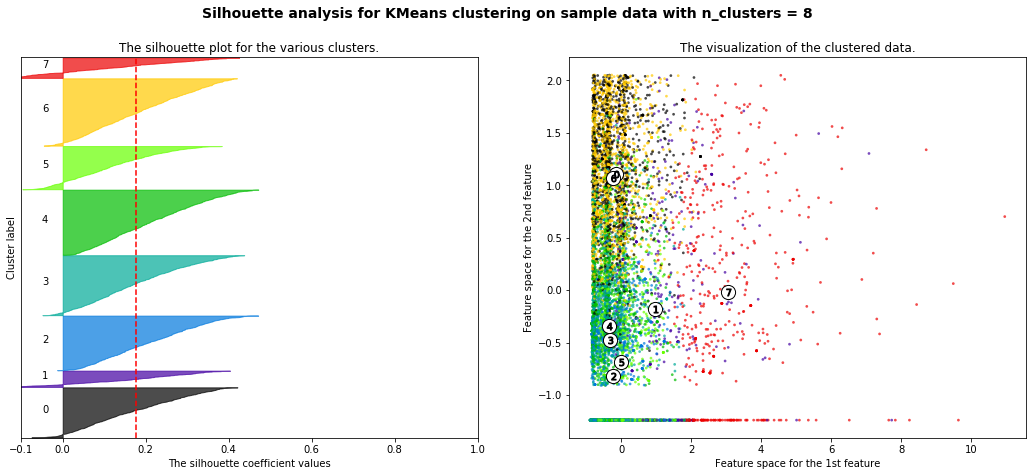

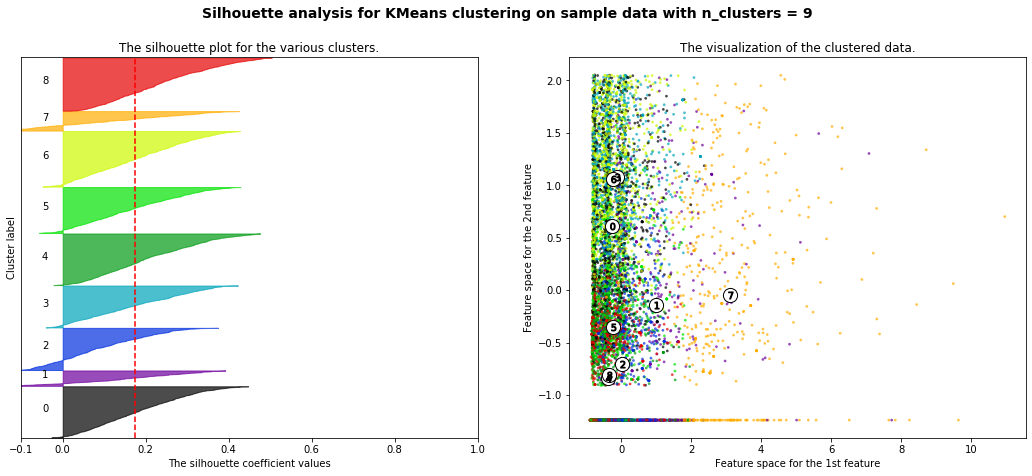

In [58]:
# Lets scale the data for the further calculations.
scaled_all_data = scale(dk1[num_cols])
scaled_all_data


cluster_range = [2,3,4,5,6,7,8,9]

for n_clusters in cluster_range:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_all_data)
    silhouette_avg = silhouette_score(scaled_all_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(scaled_all_data, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_all_data[:, 0], scaled_all_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# K-modes

In [27]:
df1.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Clusters'],
      dtype='object')

In [4]:
import sys
import time
from kmodes import kmodes
from kmodes import kprototypes

In [5]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=5, init='Huang', n_init=10, verbose=1)

clusters = km.fit_predict(df1.drop(['Customer', 'Effective To Date'], axis = 1))

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3404, cost: 107331.0
Run 1, iteration: 2/100, moves: 1245, cost: 107330.0
Run 1, iteration: 3/100, moves: 1, cost: 107330.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3715, cost: 107341.0
Run 2, iteration: 2/100, moves: 827, cost: 107339.0
Run 2, iteration: 3/100, moves: 0, cost: 107339.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3284, cost: 107098.0
Run 3, iteration: 2/100, moves: 853, cost: 106699.0
Run 3, iteration: 3/100, moves: 182, cost: 106694.0
Run 3, iteration: 4/100, moves: 1, cost: 106694.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2981, cost: 106992.0
Run 4, iteration: 2/100, moves: 561, cost: 106992.0
Init: initializing centroids
Init: initializing clusters


In [6]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=5, init='random', n_init=10, verbose=1)

clusters = km.fit_predict(df1.drop(['Customer', 'Effective To Date'], axis = 1))

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3159, cost: 106721.0
Run 1, iteration: 2/100, moves: 183, cost: 106721.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3000, cost: 107090.0
Run 2, iteration: 2/100, moves: 56, cost: 107032.0
Run 2, iteration: 3/100, moves: 56, cost: 107032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3791, cost: 106892.0
Run 3, iteration: 2/100, moves: 948, cost: 106544.0
Run 3, iteration: 3/100, moves: 268, cost: 106544.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3466, cost: 106771.0
Run 4, iteration: 2/100, moves: 17, cost: 106771.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2633, cost: 107600.0
Run 5, iteration: 2/100, m

In [7]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=5, init='Cao', n_init=10, verbose=1)

clusters = km.fit_predict(df1.drop(['Customer', 'Effective To Date'], axis = 1))

# Print the cluster centroids
print(km.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1579, cost: 107843.0
Run 1, iteration: 2/100, moves: 29, cost: 107843.0
[['California' '2004.350666' 'No' 'Basic' 'College' 'Employed' 'F' '0'
  'Suburban' 'Married' '69' '3' '50' '0' '1' 'Personal Auto'
  'Personal L3' 'Offer1' 'Agent' '316.8' 'Four-Door Car' 'Medsize']
 ['Oregon' '5169.49937' 'No' 'Extended' 'High School or Below'
  'Unemployed' 'M' '0' 'Suburban' 'Single' '73' '15' '20' '0' '2'
  'Personal Auto' 'Personal L2' 'Offer1' 'Branch' '350.4' 'Four-Door Car'
  'Medsize']
 ['Oregon' '5555.830204999998' 'No' 'Basic' 'Bachelor' 'Employed' 'M' '0'
  'Urban' 'Married' '73' '3' '61' '0' '2' 'Personal Auto' 'Personal L3'
  'Offer2' 'Call Center' '350.4' 'SUV' 'Medsize']
 ['Arizona' '2471.528431' 'No' 'Basic' 'High School or Below' 'Employed'
  'F' '0' 'Rural' 'Married' '67' '1' '10' '0' '2' 'Pers

# K prototype

In [6]:
df1.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [7]:
dk = pd.read_csv('Clustered Insurance1.csv')
dk.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2763.519279,56274,69,32,5,384.811147
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,6979.535903,0,94,13,42,1131.464935
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,12887.431650,48767,108,18,38,566.472247
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,7645.861827,0,106,18,65,529.881344
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2813.692575,43836,73,12,44,138.130879


In [49]:
from kmodes.kprototypes import KPrototypes

syms = dk[cat_cols]
X = dk[num_cols]
kproto = KPrototypes(n_clusters=5, init='Cao', verbose=2)
clusters = kproto.fit_predict(X, categorical=[1,2])
# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1762, ncost: 46976656437.864525
Run: 1, iteration: 2/100, moves: 664, ncost: 42726136471.051796
Run: 1, iteration: 3/100, moves: 603, ncost: 39820726984.39675
Run: 1, iteration: 4/100, moves: 651, ncost: 37609727363.18277
Run: 1, iteration: 5/100, moves: 604, ncost: 36138412522.83863
Run: 1, iteration: 6/100, moves: 432, ncost: 35405727207.10262
Run: 1, iteration: 7/100, moves: 227, ncost: 35121720806.67412
Run: 1, iteration: 8/100, moves: 140, ncost: 34958579859.343506
Run: 1, iteration: 9/100, moves: 71, ncost: 34771544255.680916
Run: 1, iteration: 10/100, moves: 54, ncost: 34636414052.69183
Run: 1, iteration: 11/100, moves: 29, ncost: 34561182114.821365
Run: 1, iteration: 12/100, moves: 12, ncost: 34556973768.400734
Run: 1, iteration: 13/100, moves: 3, ncost: 34556758961.50222
Run: 1, iteration: 14/100, moves: 4, ncost: 34556606185.88504
Run: 1, iteration: 15/100, moves: 

Run: 7, iteration: 7/100, moves: 84, ncost: 34948544203.76642
Run: 7, iteration: 8/100, moves: 60, ncost: 34754117595.05252
Run: 7, iteration: 9/100, moves: 42, ncost: 34636110188.080185
Run: 7, iteration: 10/100, moves: 28, ncost: 34561182114.8213
Run: 7, iteration: 11/100, moves: 12, ncost: 34556973768.40072
Run: 7, iteration: 12/100, moves: 3, ncost: 34556758961.502174
Run: 7, iteration: 13/100, moves: 4, ncost: 34556606185.885056
Run: 7, iteration: 14/100, moves: 0, ncost: 34556606185.885056
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 2620, ncost: 69120252901.16531
Run: 8, iteration: 2/100, moves: 1316, ncost: 55531683391.5618
Run: 8, iteration: 3/100, moves: 565, ncost: 49729908746.69708
Run: 8, iteration: 4/100, moves: 342, ncost: 47023298883.646576
Run: 8, iteration: 5/100, moves: 306, ncost: 45559502827.87135
Run: 8, iteration: 6/100, moves: 375, ncost: 44207471176.47064
Run: 8, iteration: 7/100, moves: 444, n

In [52]:
print(kproto.cost_)
print(kproto.n_iter_)

34556606185.885025
21


In [53]:
for s, c in zip(syms, clusters):
    print("Result: {}, cluster:{}".format(s, c))

Result: State, cluster:4
Result: Response, cluster:3
Result: Coverage, cluster:1
Result: Education, cluster:3
Result: EmploymentStatus, cluster:4
Result: Gender, cluster:3
Result: Location Code, cluster:4
Result: Marital Status, cluster:3
Result: Policy Type, cluster:2
Result: Policy, cluster:3
Result: Renew Offer Type, cluster:4
Result: Sales Channel, cluster:3
Result: Vehicle Class, cluster:3
Result: Vehicle Size, cluster:3
Result: Number of Open Complaints, cluster:4
Result: Number of Policies, cluster:3


In [54]:
result = zip(syms, kproto.labels_)
sortedR = sorted(result, key=lambda x: x[1])
print(sortedR)

[('Coverage', 1), ('Policy Type', 2), ('Response', 3), ('Education', 3), ('Gender', 3), ('Marital Status', 3), ('Policy', 3), ('Sales Channel', 3), ('Vehicle Class', 3), ('Vehicle Size', 3), ('Number of Policies', 3), ('State', 4), ('EmploymentStatus', 4), ('Location Code', 4), ('Renew Offer Type', 4), ('Number of Open Complaints', 4)]
